In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



## Check if GPU is available and use it

In [7]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



## Transformations

In [8]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])




# Set parameters

In [9]:

batch_size = 4
num_workers = 2



# Load training data and Load test data

In [10]:

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)



Files already downloaded and verified
Files already downloaded and verified


# Class names for CIFAR-10

In [11]:
# Class names for CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



# Function to show images

In [12]:
# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()  
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Use next() instead of .next()



# Call function to show images and Define the CNN model

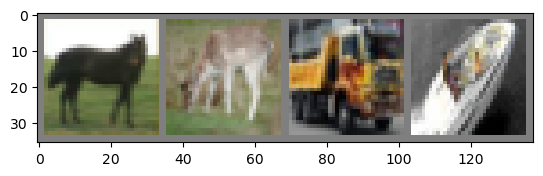

horse deer truck ship


In [13]:

imshow(torchvision.utils.make_grid(images))
print(' '.join('%s' % classes[labels[j]] for j in range(batch_size)))


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



# Instantiate the model and move it to the device

In [15]:

net = Net().to(device)
print(net)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# Start training

In [17]:

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')



[1,  2000] loss: 2.230
[1,  4000] loss: 1.874
[1,  6000] loss: 1.667
[1,  8000] loss: 1.575
[1, 10000] loss: 1.529
[1, 12000] loss: 1.455
[2,  2000] loss: 1.388
[2,  4000] loss: 1.388
[2,  6000] loss: 1.375
[2,  8000] loss: 1.314
[2, 10000] loss: 1.323
[2, 12000] loss: 1.299
Finished Training


# Test the model

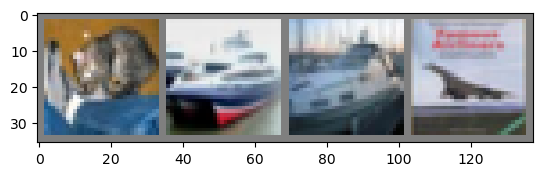

GroundTruth:  cat ship ship plane


In [18]:
# Test the model
dataiter = iter(testloader)
images, labels = next(dataiter)

# Move images to CPU for plotting
imshow(torchvision.utils.make_grid(images.cpu()))
print('GroundTruth: ', ' '.join('%s' % classes[labels[j]] for j in range(4)))


